# Assignment 2

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_bvp

## Problem 1

### Backward Euler's Method

Text(0, 0.5, 'y-axis')

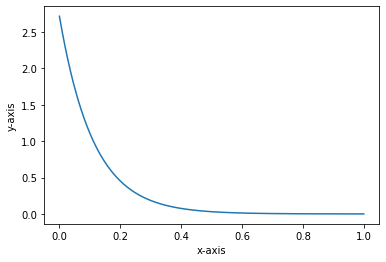

In [67]:
N=1000
x_max=1
x_min=0
h=(x_max-x_min)/N
y0=np.exp(1)
yi=y0
y=[y0]
x=[x_min]
for i in range(N):
    xi=x_min+h*(i+1)
    yip1=yi/(1+9*h)  #yip1 means y_(i+1)
    yi=yip1
    y.append(yi)
    x.append(xi)
plt.plot(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0, 0.5, 'y-axis')

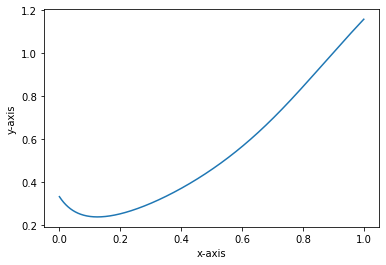

In [68]:
N=1000
x_max=1
x_min=0
h=(x_max-x_min)/N
y0=1/3
yi=y0
y=[y0]
x=[x_min]
for i in range(N):
    xi=x_min+h*(i+1)
    xip1=xi+h
    a=20*h
    b=(1-40*h*xip1)
    c=-2*xip1*h*(1-10*xip1)-yi
    yp=(-b+np.sqrt(b*b-4*a*c))/(2*a)
    yn=(-b+np.sqrt(b*b-4*a*c))/(2*a)
    diff1=abs(yp-yi)
    diff2=abs(yn-yi)
    if(diff1<diff2):
        yip1=yp
    else:
        yip1=yn
    yi=yip1
    y.append(yi)
    x.append(xi)
plt.plot(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

## Problem 2

### Euler's Method

In [208]:
def f(t,y):
    f=y/t-(y/t)**2
    return f
def y(t):
    y=t/(1+np.log(t))
    return y

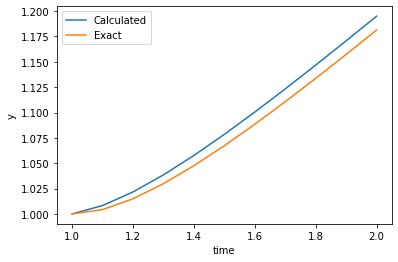

Text(0.5, 0, 'time')

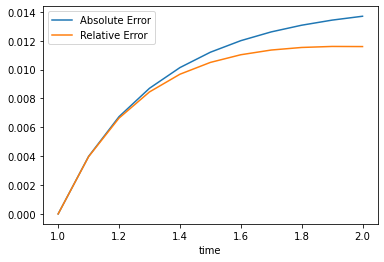

In [209]:
h=0.1
t_max=2
t_min=1
N=int((t_max-t_min)/h)
y0=1
yi=y0
y_cal=[y0]
y_exact=[y0]
t=[t_min]
Absolute_error=[0]
Relative_error=[0]
for i in range(N):
    ti=t_min+h*(i+1)
    yip1=yi+h*f(ti,yi)
    yi=yip1
    y_cal.append(yi)
    y_val=y(ti)
    y_exact.append(y_val)
    t.append(ti)
    A_er=abs(yi-y_val)
    Absolute_error.append(A_er)
    R_er=abs((yi-y_val)/y_val)
    Relative_error.append(R_er)
    
plt.plot(t,y_cal)
plt.plot(t,y_exact)
plt.legend(["Calculated","Exact"])
plt.xlabel("time")
plt.ylabel("y")
plt.show()
plt.plot(t,Absolute_error)
plt.plot(t,Relative_error)
plt.legend(["Absolute Error","Relative Error"])
plt.xlabel("time")

## Problem 3 

### RK4

In [91]:
def fv(x,y,v):
    fv=2*v-y+x*np.exp(x)-x
    return fv
def fy(v):
    return v

Text(0, 0.5, 'y-axis')

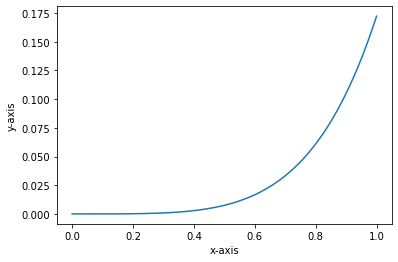

In [94]:
N=1000
x_max=1
x_min=0
h=(x_max-x_min)/N
y0=0
v0=0
yi=y0
vi=v0
y=[y0]
v=[v0]
x=[x_min]
for i in range(N):
    xi=x_min+h*(i+1)
    #k1
    k1y=h*fy(vi)
    k1v=h*fv(xi,yi,vi)
    #k2
    k2y=h*fy(vi+k1v/2)
    k2v=h*fv(xi+h/2,yi+k1y/2,vi+k1v/2)
    #k3
    k3y=h*fy(vi+k2v/2)
    k3v=h*fv(xi+h/2,yi+k2y/2,vi+k2v/2)
    #k4
    k4y=h*fy(vi+k3v)
    k4v=h*fv(xi+h,yi+k3y,vi+k3v)
    
    yip1=yi+(1/6)*(k1y+2*k2y+2*k3y+k4y)
    vip1=vi+(1/6)*(k1v+2*k2v+2*k3v+k4v)
    
    yi=yip1
    vi=vip1
    y.append(yi)
    v.append(vi)
    x.append(xi)
plt.plot(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

## Problem 6

### Shooting Method

In [49]:
#Euler Method
def Euler(a):
    N=10000
    t_max=10
    t_min=0
    h=(t_max-t_min)/N
    x0=0
    xi=x0
    x_value=[xi]
    ti=t_min
    t_value=[ti]
    v0=a
    vi=v0
    for i in range(N):
        ti=t_min+h*i
        xip1=xi+h*vi
        vip1=vi+h*(-10)
        xi=xip1
        vi=vip1
        t_value.append(ti)
        x_value.append(xi)
    return xi,t_value,x_value

In [50]:
#Finding appropriate value of a i.e. y'(0)=a
a=np.linspace(49,51,101)
a=a.tolist()
x_find=[]
for i in a:
    x_find.append(Euler(i)[0])
    N=a.index(i)
    #print(i,Euler(i)[0])
    #if (np.sign(x[N-1])!=np.sign(x[N])):
        #print (i,Euler(i)[0])

In [51]:
x_find_abs=np.abs(x_find)
index=np.argmin(x_find_abs)
a_min=a[index]
a_min

50.0

In [52]:
t=np.linspace(0,10,10)
x_exact=[50*i-5*(i*i) for i in t]

Text(0, 0.5, '-----x----->')

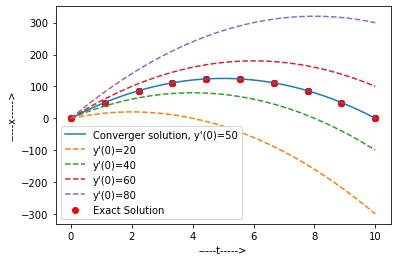

In [66]:
#a=np.linspace(10,80,25)
a=[20,40,60,80]
plt.plot(Euler(50.0)[1],Euler(50.0)[2])
for i in a:
    plt.plot(Euler(i)[1],Euler(i)[2],"--")
    plt.scatter(t,x_exact,color="Red")
plt.legend(["Converger solution, y'(0)=50","y'(0)=20","y'(0)=40","y'(0)=60","y'(0)=80","Exact Solution"])
plt.xlabel("-----t----->")
plt.ylabel("-----x----->")

## Problem 7

### Relaxation Method

In [285]:
N=100
t_max=10
t_min=0
g=10
h=(t_max-t_min)/(N-1)
x=np.zeros(N)
t=np.linspace(t_min,t_max,N)
t_1=np.linspace(t_min,t_max,10)
x_exact=[50*i-5*(i*i) for i in t_1]
tol=1 #define to enter the while loop
while tol>5e-2:
    x_last=x.copy()
    for i in range(1,N-1):
        x[i]=0.5*(g*h*h+x[i+1]+x[i-1])
        
    tol=max(np.abs(x-x_last))
#x1=x ; #tol 1e-1
#x2=x ; #tol 5e-2
#x3=x ; #tol 1e-2
#x4=x ; #tol 5e-3
#x5=x ; #tol 1e-3

Text(0, 0.5, 'x')

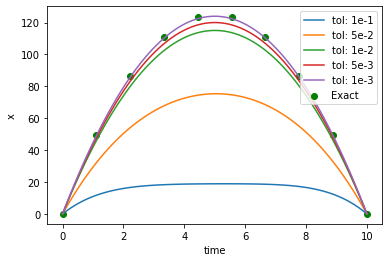

In [287]:
plt.plot(t,x1,t,x2,t,x3,t,x4,t,x5)
plt.scatter(t_1,x_exact,color="Green")
plt.legend(["tol: 1e-1","tol: 5e-2","tol: 1e-2","tol: 5e-3","tol: 1e-3","Exact"])
plt.xlabel("time")
plt.ylabel("x")

## Problem 8

### Initial Value Problem using scipy.integrate.solve_ivp

#### System 1

In [77]:
from scipy.integrate import solve_ivp
def derivative1(t, y):
    return t*np.exp(3*t)-2*y

t_eval=[0.1*i for i in range(11)]
sol = solve_ivp(derivative1, [0, 1], [0],
                t_eval=[0.1*i for i in range(11)])
def y_Exact1(t):
    return (1/25)*np.exp(-2*t)*(1+np.exp(5*t)*(-1+5*t))
y_exact_sol=[y_Exact1(i) for i in t_eval]

Text(0, 0.5, 'y')

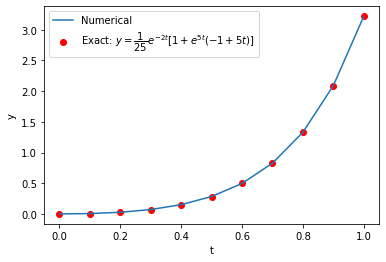

In [78]:
plt.plot(t_eval,sol.y[0])
plt.scatter(t_eval,y_exact_sol,color="Red")
plt.legend(["Numerical","Exact: $y=\dfrac{1}{25}e^{-2t}[1+e^{5t}(-1+5t)]$"])
plt.xlabel("t")
plt.ylabel("y")

#### System 2

In [75]:
from scipy.integrate import solve_ivp
def derivative2(t, y):
    return 1-(t-y)**2

t_eval=[2+0.1*i for i in range(10)]
sol = solve_ivp(derivative2, [2, 3.0], [1],
                t_eval=[(2+0.1*i) for i in range(11)])
def y_Exact2(t):
    return (1-3*t+t*t)/(t-3)
y_exact_sol=[y_Exact2(i) for i in t_eval]

Text(0, 0.5, 'y')

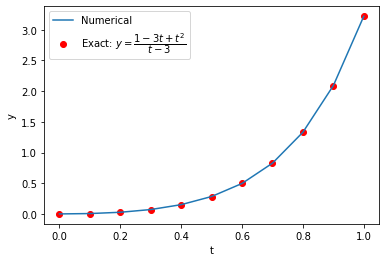

In [79]:
plt.plot(t_eval,sol.y[0])
plt.scatter(t_eval,y_exact_sol,color="Red")
plt.legend(["Numerical","Exact: $y=\dfrac{1-3t+t^2}{t-3}$"])
plt.xlabel("t")
plt.ylabel("y")

#### System 3

In [80]:
from scipy.integrate import solve_ivp
def derivative3(t, y):
    return 1+y/t

t_eval=[1+0.1*i for i in range(11)]
sol = solve_ivp(derivative3, [1,2], [2],
                t_eval=[(1+0.1*i) for i in range(11)])
def y_Exact3(t):
    return t*(2+np.log(t))
y_exact_sol=[y_Exact3(i) for i in t_eval]

Text(0, 0.5, 'y')

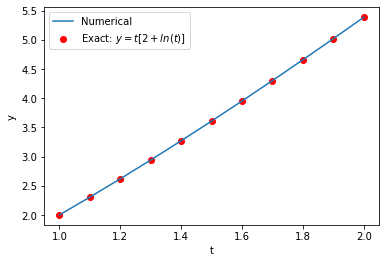

In [82]:
plt.plot(t_eval,sol.y[0])
plt.scatter(t_eval,y_exact_sol,color="Red")
plt.legend(["Numerical","Exact: $y=t[2+ln(t)]$"])
plt.xlabel("t")
plt.ylabel("y")

#### System 4

In [84]:
from scipy.integrate import solve_ivp
def derivative4(t, y):
    return np.cos(2*t)+np.sin(3*t)

t_eval=[0.1*i for i in range(11)]
sol = solve_ivp(derivative4, [0,1], [1],
                t_eval=[0.1*i for i in range(11)])
def y_Exact3(t):
    return 1/6.*(8-2*np.cos(3*t)+3*np.sin(2*t))

y_exact_sol=[y_Exact3(i) for i in t_eval]

Text(0, 0.5, 'y')

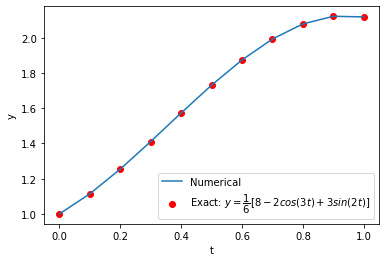

In [85]:
plt.plot(t_eval,sol.y[0])
plt.scatter(t_eval,y_exact_sol,color="Red")
plt.legend(["Numerical","Exact: $y=\dfrac{1}{6}[8-2cos(3t)+3sin(2t)]$"])
plt.xlabel("t")
plt.ylabel("y")

## Problem 9

### Boundary Value Problem using  scipy.integrate.solve_bvp

#### System 1

In [24]:
from scipy.integrate import solve_bvp

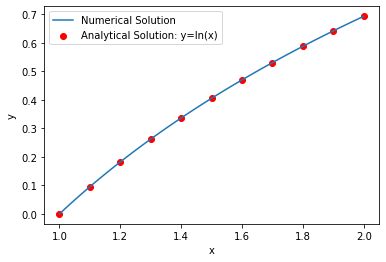

In [297]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(-2*y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]-np.log(2)])

def y_exact(x):
    return np.log(x)

x = np.linspace(1,2,10)

y = np.zeros((2, x.shape[0]))


res=solve_bvp(fun, bc, x, y)


x_plot = np.linspace(1, 2, 100)
y_plot = res.sol(x_plot)

x_dummy=np.linspace(1,2,11)
y_actual=[y_exact(x) for x in x_dummy]



plt.plot(x_plot, y_plot[0], label='Numerical Solution')
plt.scatter(x_dummy,y_actual,color="Red",label="Analytical Solution: y=ln(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### System 2

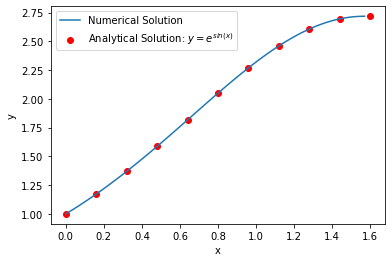

In [87]:
def bc(ya,yb):
    return np.array([ya[0]-1, yb[0]-np.exp(1)]) 

def fun(x, y):
    return np.vstack((y[1], y[1]*np.cos(x)-y[0]*np.log(y[0]+0.001)))

def y_exact(x):
    return np.exp(np.sin(x))

x = np.linspace(0,np.pi/2,10)

y = np.zeros((2, x.shape[0]))


res=solve_bvp(fun, bc, x, y)


x_plot = np.linspace(0,np.pi/2, 100)
y_plot = res.sol(x_plot)

x_dummy=np.linspace(0,1.6,11)
y_actual=[y_exact(x) for x in x_dummy]


plt.plot(x_plot, y_plot[0], label='Numerical Solution')
plt.scatter(x_dummy,y_actual,color="Red",label="Analytical Solution: $y=e^{sin(x)}$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### System 3

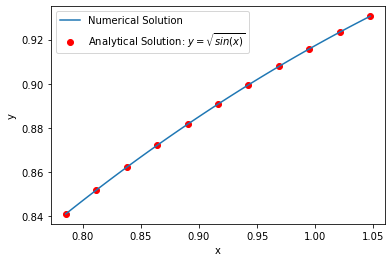

In [88]:
def fun(x, y):
    return np.vstack((y[1], -(2*y[1]**3+(y[0]**2)*y[1])/np.cos(x)))

def bc(ya, yb):
    return np.array([ya[0]-2**(-1/4.), yb[0]-(12**(1/4.))/2])

def y_exact(x):
    return np.sqrt(np.sin(x))

x = np.linspace(np.pi/4,np.pi/3,10)

y = np.zeros((2, x.shape[0]))


res=solve_bvp(fun, bc, x, y)


x_plot = np.linspace(np.pi/4,np.pi/3, 100)
y_plot = res.sol(x_plot)

x_dummy=np.linspace(np.pi/4,np.pi/3,11)
y_actual=[y_exact(x) for x in x_dummy]


plt.plot(x_plot, y_plot[0], label='Numerical Solution')
plt.scatter(x_dummy,y_actual,color="Red",label="Analytical Solution: $y=\sqrt{sin(x)}$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### System 4

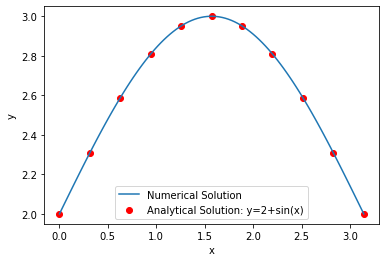

In [314]:
def fun(x, y):
    return np.vstack((y[1], 0.5-(y[1]**2)/2-y[0]*np.sin(x)/2 ))

def bc(ya, yb):
    return np.array([ya[0]-2, yb[0]-2])

def y_exact(x):
    return 2+np.sin(x)

x = np.linspace(0,np.pi,10)

y = np.zeros((2, x.shape[0]))


res=solve_bvp(fun, bc, x, y)


x_plot = np.linspace(0, np.pi, 100)
y_plot = res.sol(x_plot)

x_dummy=np.linspace(0, np.pi,11)
y_actual=[y_exact(x) for x in x_dummy]



plt.plot(x_plot, y_plot[0], label='Numerical Solution')
plt.scatter(x_dummy,y_actual,color="Red",label="Analytical Solution: y=2+sin(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Problem 10

### Adaptive step_size control RK4

Text(0, 0.5, '----y---->')

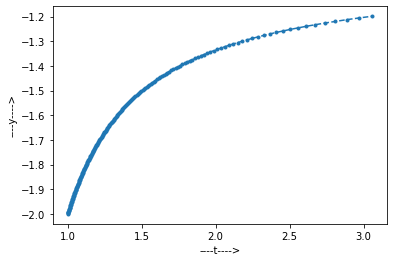

In [45]:
def RK4(f, t, y, h):
    
  k1 = f(t, y)
  k2 = f(t + h / 2, y + h * k1 / 2)
  k3 = f(t + h / 2, y + h * k2 / 2)
  k4 = f(t + h, y + h * k3)

  return y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

def f(t, y):
  return y*(y+1)/t

def Adaptive_step_size_RK4(f, t_start, t_end, y_start, h_start, tol):
  """
  Adaptive Runge-Kutta 4 method.

  Args:
    f: The differential equation function.
    t_start: The start time.
    t_end: The end time.
    y_start: The start state.
    h_start: The initial step size.
    tol: The error tolerance.

  Returns:
    A list of (time, state) pairs.
  """

  t = t_start
  y = y_start
  h = h_start
  
  while t <= t_end:

    t =t+h
        
    y_h = RK4(f, t, y, h) #y_h=y(t+h)
    
    y1= RK4(f, t, y_h, h) #y(t)=y --> y(t+h)=y_h --> y(t+2h)=y1
    
    y2 = RK4(f, t, y, 2*h)# y(t)=y --> y(t+2h)=y2

    err = np.abs(y1-y2)
    
    rho=(tol*h*30/err)
    
   
    h=h*(rho**0.25) 

    y = y_h

    yield t, y

# Example usage:


t_start = 1
t_end = 3
y_start = -2
h_start =0.001
tol = 1e-4

t_list=[t_start]
y_list=[y_start]

for t, y in Adaptive_step_size_RK4(f, t_start, t_end, y_start, h_start, tol):
    t_list.append(t)
    y_list.append(y)
plt.plot(t_list,y_list,marker='o',linestyle="--",markersize=3)
plt.xlabel("----t---->")
plt.ylabel("----y---->")

## Problem 11

### RK4 over the domain 0< t< inf

In [90]:
def RK4(u,h,f,xi):
    k1=h*f(u,xi)
    k2=h*f(u+h/2,xi+k1/2)
    k3=h*f(u+h/2,xi+k2/2)
    k4=h*f(u+h,xi+k3)
    xip1=xi+(1/6)*(k1+2*k2+2*k3+k4)
    return xip1

def f(u,x):
    aa=(u*u+x*x*(1-u)*(1-u))
    return 1/aa

# Given t in range between 0 to infinity
# Do transformation of t--> u=t/(1+t) such that 0<=u<1

def u(t):
    return t/(1+t)

In [91]:
t_start=0
#t_end=inf

u_start=0
u_end=1

N=np.int(1e7)
h=(u_end-u_start)/(N-1)

x_start=1
x_list=[x_start]
u_list=[u_start]
xi=x_start
for i in range(1,N-1):
    ui=u_start+h*i
    x_new=RK4(ui,h,f,xi)
    x_list.append(x_new)
    xi=x_new
    u_list.append(ui)

C:\Users\HP\AppData\Local\Temp/ipykernel_6120/3741896740.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N=np.int(1e7)


Text(0, 0.5, '----x---->')

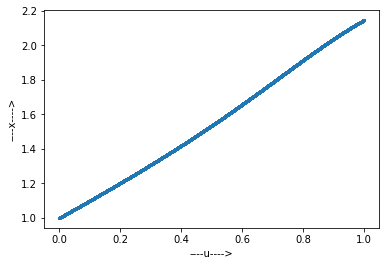

In [93]:
plt.plot(u_list,x_list,marker='o',linestyle="--",markersize=2) 
plt.xlabel("----u---->")
plt.ylabel("----x---->")

In [94]:
def t(u):
    return u/(1-u)

t_list=[t(i) for i in u_list ]

Crossing point of vertical line and Numerical Solution indicating the point t=3.5e6 and x=2.145


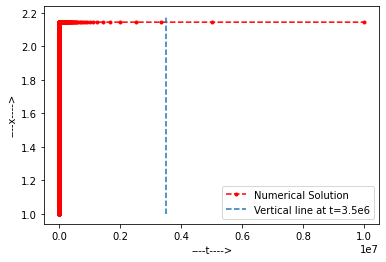

In [100]:
plt.plot(t_list,x_list,marker='o',linestyle="--",markersize=3,color="Red") 
plt.plot([3.5e6,3.5e6],[1.0,2.18],"--")
plt.xlabel("----t---->")
plt.ylabel("----x---->")
plt.legend(["Numerical Solution","Vertical line at t=3.5e6"])
print("Crossing point of vertical line and Numerical Solution indicating the point t=3.5e6 and x=2.145")

In [14]:
print("We get saturated value of x(=2.144) all the way between 5e5 to 1e7.")
print("Value of x at t=3.5e6 is equal to: ", "%.3f" % x_list[-3])

We get saturated value of x(=2.144) all the way between 5e5 to 1e7.
Value of x at t=3.5e6 is equal to:  2.145


## Problem 12

### RK4  Initial Value Problem

Text(0, 0.5, '-----u---->')

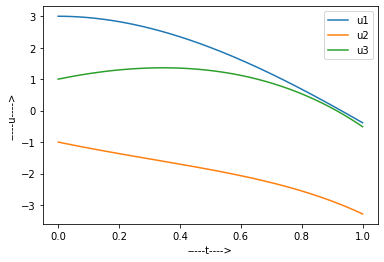

In [6]:
N=1000
t_max=1
t_min=0
h=(t_max-t_min)/(N-1)

#Initial Condition
u1=3
u2=-1
u3=1

u1_list=[u1]
u2_list=[u2]
u3_list=[u3]

t_list=[t_min]

def f1(t,u1,u2,u3):
    return u1+2*u2-2*u3+np.exp(-t)

def f2(t,u1,u2,u3):
    return u2+u3-2*np.exp(-t)

def f3(t,u1,u2,u3):
    return u1+2*u2+np.exp(-t)


for i in range(N-1):
    t=t_min+h*(i+1)
    #k1
    k1_1=h*f1(t,u1,u2,u3)
    k1_2=h*f2(t,u1,u2,u3)
    k1_3=h*f3(t,u1,u2,u3)
    #k2
    k2_1=h*f1(t+h/2,u1+k1_1/2,u2+k1_2/2,u3+k1_3/2)
    k2_2=h*f2(t+h/2,u1+k1_1/2,u2+k1_2/2,u3+k1_3/2)
    k2_3=h*f3(t+h/2,u1+k1_1/2,u2+k1_2/2,u3+k1_3/2)
    #k3
    k3_1=h*f1(t+h/2,u1+k2_1/2,u2+k2_2/2,u3+k2_3/2)
    k3_2=h*f2(t+h/2,u1+k2_1/2,u2+k2_2/2,u3+k2_3/2)
    k3_3=h*f3(t+h/2,u1+k2_1/2,u2+k2_2/2,u3+k2_3/2)
    #k4
    k4_1=h*f1(t+h,u1+k3_1,u2+k3_2,u3+k3_3)
    k4_2=h*f2(t+h,u1+k3_1,u2+k3_2,u3+k3_3)
    k4_3=h*f3(t+h,u1+k3_1,u2+k3_2,u3+k3_3)
    
    u1_new=u1+(1/6)*(k1_1+2*k2_1+2*k3_1+k4_1)
    u2_new=u2+(1/6)*(k1_2+2*k2_2+2*k3_2+k4_2)
    u3_new=u3+(1/6)*(k1_3+2*k2_3+2*k3_3+k4_3)
    
    u1=u1_new
    u2=u2_new
    u3=u3_new
    
    u1_list.append(u1)
    u2_list.append(u2)
    u3_list.append(u3)
    t_list.append(t)
    
plt.plot(t_list,u1_list)
plt.plot(t_list,u2_list)
plt.plot(t_list,u3_list)
plt.legend(["u1","u2","u3"])
plt.xlabel("-----t---->")
plt.ylabel("-----u---->")

## Problem 14

### Euler method Initial Value Problem

In [226]:
def fv(t,y,v):
    fv=(2*t*v-2*y+t*t*t*np.log(t))/(t*t)
    return fv
def fy(v):
    return v
def y_actual(t):
    return 7*t/4+(t*t*t/2)*np.log(t)-3*t*t*t/4

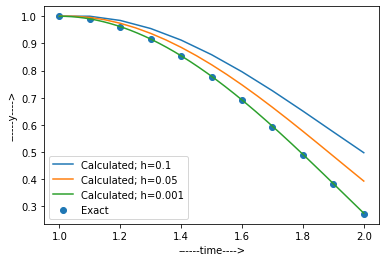

In [250]:
h=0.05
t_max=2
t_min=1
N=1+int((t_max-t_min)/h)

# Initial Condition
y=1
v=0

y_cal_2=[y]
#_exact_1=[y]

t_list_2=[t_min]

for i in range(N-1):
    t=t_min+h*(i+1)
    
    y_new=y+h*fy(v)
    v_new=v+h*fv(t,y,v)
    
    y=y_new
    v=v_new
    y_val=y_actual(t)
    
    y_cal_2.append(y)
    #y_exact_1.append(y_val)
    t_list_2.append(t)
    
plt.plot(t_list_1,y_cal_1)
plt.plot(t_list_2,y_cal_2)
plt.plot(t_list_3,y_cal_3)
#plt.plot(t_list_1,y_exact_1,marker='o',linestyle="--",markersize=3,color="Yellow")
plt.scatter(t_list_1,y_exact_1)
plt.legend(["Calculated; h=0.1","Calculated; h=0.05","Calculated; h=0.001","Exact"])
plt.xlabel("------time---->")
plt.ylabel("------y---->")
plt.show()